## **<center>Supervised Machine Learning</center>**
## <center>Hand-on Practice</center>

<img src="https://www.brainsigns.com/media/k2/items/cache/79e08f32fa8a036f84441baab7b7a7ff_L.jpg" width="1260" height="440" align="center"/>


**<center>Early Detection of Heart Arrhythmias</center>**

# **WORKING ENVIRONMENT SET UP**

In [1]:
import os
os.listdir()

['.config',
 'cudb_4_X.csv',
 'cudb_4_y.csv',
 'vfdb_4_X.csv',
 'vfdb_4_y.csv',
 'sample_data']

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier 


# Tree Visualization
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# LOAD DATA

Based on data from public databases, such as the MIT-BIH Malignant Ventricular Arrhythmia database (VFDB), the Creighton University Ventricular Tachycardia database (CUDB) containing a selection of long-term Holter ECG recording, we computed a combination of 30 previously defined ECG features. The aim of this study is to explore the differences in the detection of Sh rhythms using different classification algorithms. 


## **Description**

**Temporal features** to characterize the amplitude, slope, sample distribution or heart rate of the rhythm. 

* TCI = threshold crossing interval 

* TCSC = threshold crossing sample count 

* Exp = standard exponential

* Expmod = modified exponential 

* MAV = mean absolute value

* count1 

* count2 

* count3

* x1

* x2

* bCP

**Spectral features** to quantify spectral concentration, normalized spectral moments or the rela- tive power content in different frequency bands.

* vFleak = VF filter

* M

* A1

* A2

* A3

* x3

* x4

* x5

* bWT

**Time-frequency features**

* Li = The Li feature based on the wavelet analysis of the ECG.

**Complexity features** The most representative measures of the complexity of the ECG

* CM = complexity measure

* CVbin = covariance

* abin = area

* Frqbin = frequency

* Kurt = Kurtosis of a binary signal extracted from the ECG

* PSR = The phase space recon- struction 

* HILB = Hilbert transform

* SamEn = Sample entropy

In [0]:
param = ['TCI', 'TCSC', 'exp','expmod','cm','cvbin', 'frqbin', 'abin','kurt','vfleak','M','A1','A2','A3',
        'mav','psr', 'hilb', 'SamEn', 'x3', 'x4', 'x5', 'x1', 'x2', 'bCP', 'bWT', 'bW','Li', 'count1', 'count2',
        'count3']

vfdb_y = pd.read_csv('vfdb_4_y.csv')
vfdb_X = pd.read_csv('vfdb_4_X.csv')

cudb_y = pd.read_csv('cudb_4_y.csv')
cudb_X = pd.read_csv('cudb_4_X.csv')

vfdb_X.columns = param
cudb_X.columns = param

vfdb_X['label'] = vfdb_y
cudb_X['label'] = cudb_y


In [4]:
vfdb_X.head()

TCI    TCSC  exp  expmod  ...  count1  count2   count3  label
0  360.08  42.933   60     135  ...   19.25   73.75   8.0208     10
1  333.41  54.733  120     150  ...   45.00   89.25  25.8700     10
2  359.18  46.600   90     180  ...   28.50   78.25  13.4750     10
3  416.67  41.867    0     135  ...   28.50   77.50  13.6130     10
4  544.08  49.333  120     120  ...   24.75   74.75  10.5270     10

[5 rows x 31 columns]

In [5]:
vfdb_X.shape

(9346, 31)

In [6]:
cudb_X.head(5)

TCI    TCSC  exp  expmod       cm  ...      Li  count1  count2  count3  label
0  1055.8  4.7333   90      60  0.19932  ...  15.452   14.50   61.00  4.1044     10
1  1084.0  3.1333   75      45  0.15945  ...  22.162   16.25   57.50  4.3208     10
2  1084.2  3.1333   75      45  0.14949  ...  15.159   12.75   51.75  3.0232     10
3  1084.4  4.8000   90      60  0.16942  ...  12.685   15.75   59.25  4.3658     10
4  1086.2  4.9333   90      60  0.13952  ...  18.945   16.00   58.50  4.3636     10

[5 rows x 31 columns]

In [7]:
cudb_X.shape

(3701, 31)

**Concat datasets:**

In [0]:
data = pd.concat([vfdb_X,cudb_X])

In [9]:
data.shape

(13047, 31)

## Label Description
LABELS have been assigned according to this code:       

* AB = 1
* AFIB= 2
* AFL = 3
* ASYS= 4
* B= 5
* BI = 6
* BII = 7
* HGEA = 8
* IVR = 9
* N = 10
* NOD = 11
* NOISE = 12
* P = 13
* PREX = 14
* SBR = 15
* SVTA = 16
* T =17
* VER = 18
* VF = 19
* VFL = 20
* VT = 21
* sTV = 22
* others = 23
* fineVF = 24

https://archive.physionet.org/physiobank/annotations.shtml



**In this study we want to distinguish between shockable and non-shockable rhythms. Therefore, we will separate the inputs related to VT (ventricular tachycardia) VF (ventricular fibrillation) and VFL (ventricular flutter) from the rest.** 







In [0]:
data['VF'] = np.where(data['label']== 19, 1, 
                 np.where(data['label'] == 20, 1, 
                 np.where(data['label'] == 21, 1, 0)))

In [11]:
data.sample(15)

TCI     TCSC  exp  expmod  ...  count2   count3  label  VF
5016   361.47  32.0000    0     165  ...   76.50   8.4161      6   0
429    304.72  54.2000   75     180  ...   95.00  23.5460     19   1
6930   166.67   5.2000    0     240  ...   62.75   5.4082     10   0
7131   400.54   4.9333    0     210  ...   59.25   4.3966     10   0
590    500.00  63.8670   60     195  ...   87.75  17.2580     10   0
3139   316.64  24.8000   60     180  ...   64.50   4.0312     10   0
823    375.00  49.8670   90     225  ...  100.00  28.9520     19   1
5492   579.87  13.9330   30     120  ...   76.25   7.4657     13   0
6499  1022.20  23.0000   90     105  ...   63.00   5.7113     16   0
7293   464.41   8.4000   90     105  ...   88.00   9.4088     10   0
8404   453.15  19.0000    0      90  ...   65.00   7.2738     10   0
4198   335.82  18.7330    0     165  ...   65.75   5.9484      6   0
6480   330.43  76.9330  240     150  ...   81.00  10.8230     21   1
3912   277.60  60.6670  120     210  ...   96.25  18.2320     21   1
372    538.92  50.5330  165     120  ...   81.00  11.6600     10   0

[15 rows x 32 columns]

In [12]:
data['VF'].value_counts()

0    10745
1     2302
Name: VF, dtype: int64

In [0]:
df = data.drop(columns=['label'])

# DESCRIPTIVE ANALYSIS

In [0]:
param1 = ['TCI', 'TCSC', 'exp','expmod','cm','cvbin', 'frqbin', 'abin','kurt','vfleak','M','A1','A2','A3','mav', 'VF']

param2 = ['psr', 'hilb', 'SamEn', 'x3', 'x4', 'x5', 'x1', 'x2', 'bCP', 'bWT', 'bW','Li', 'count1', 'count2','count3', 'VF']

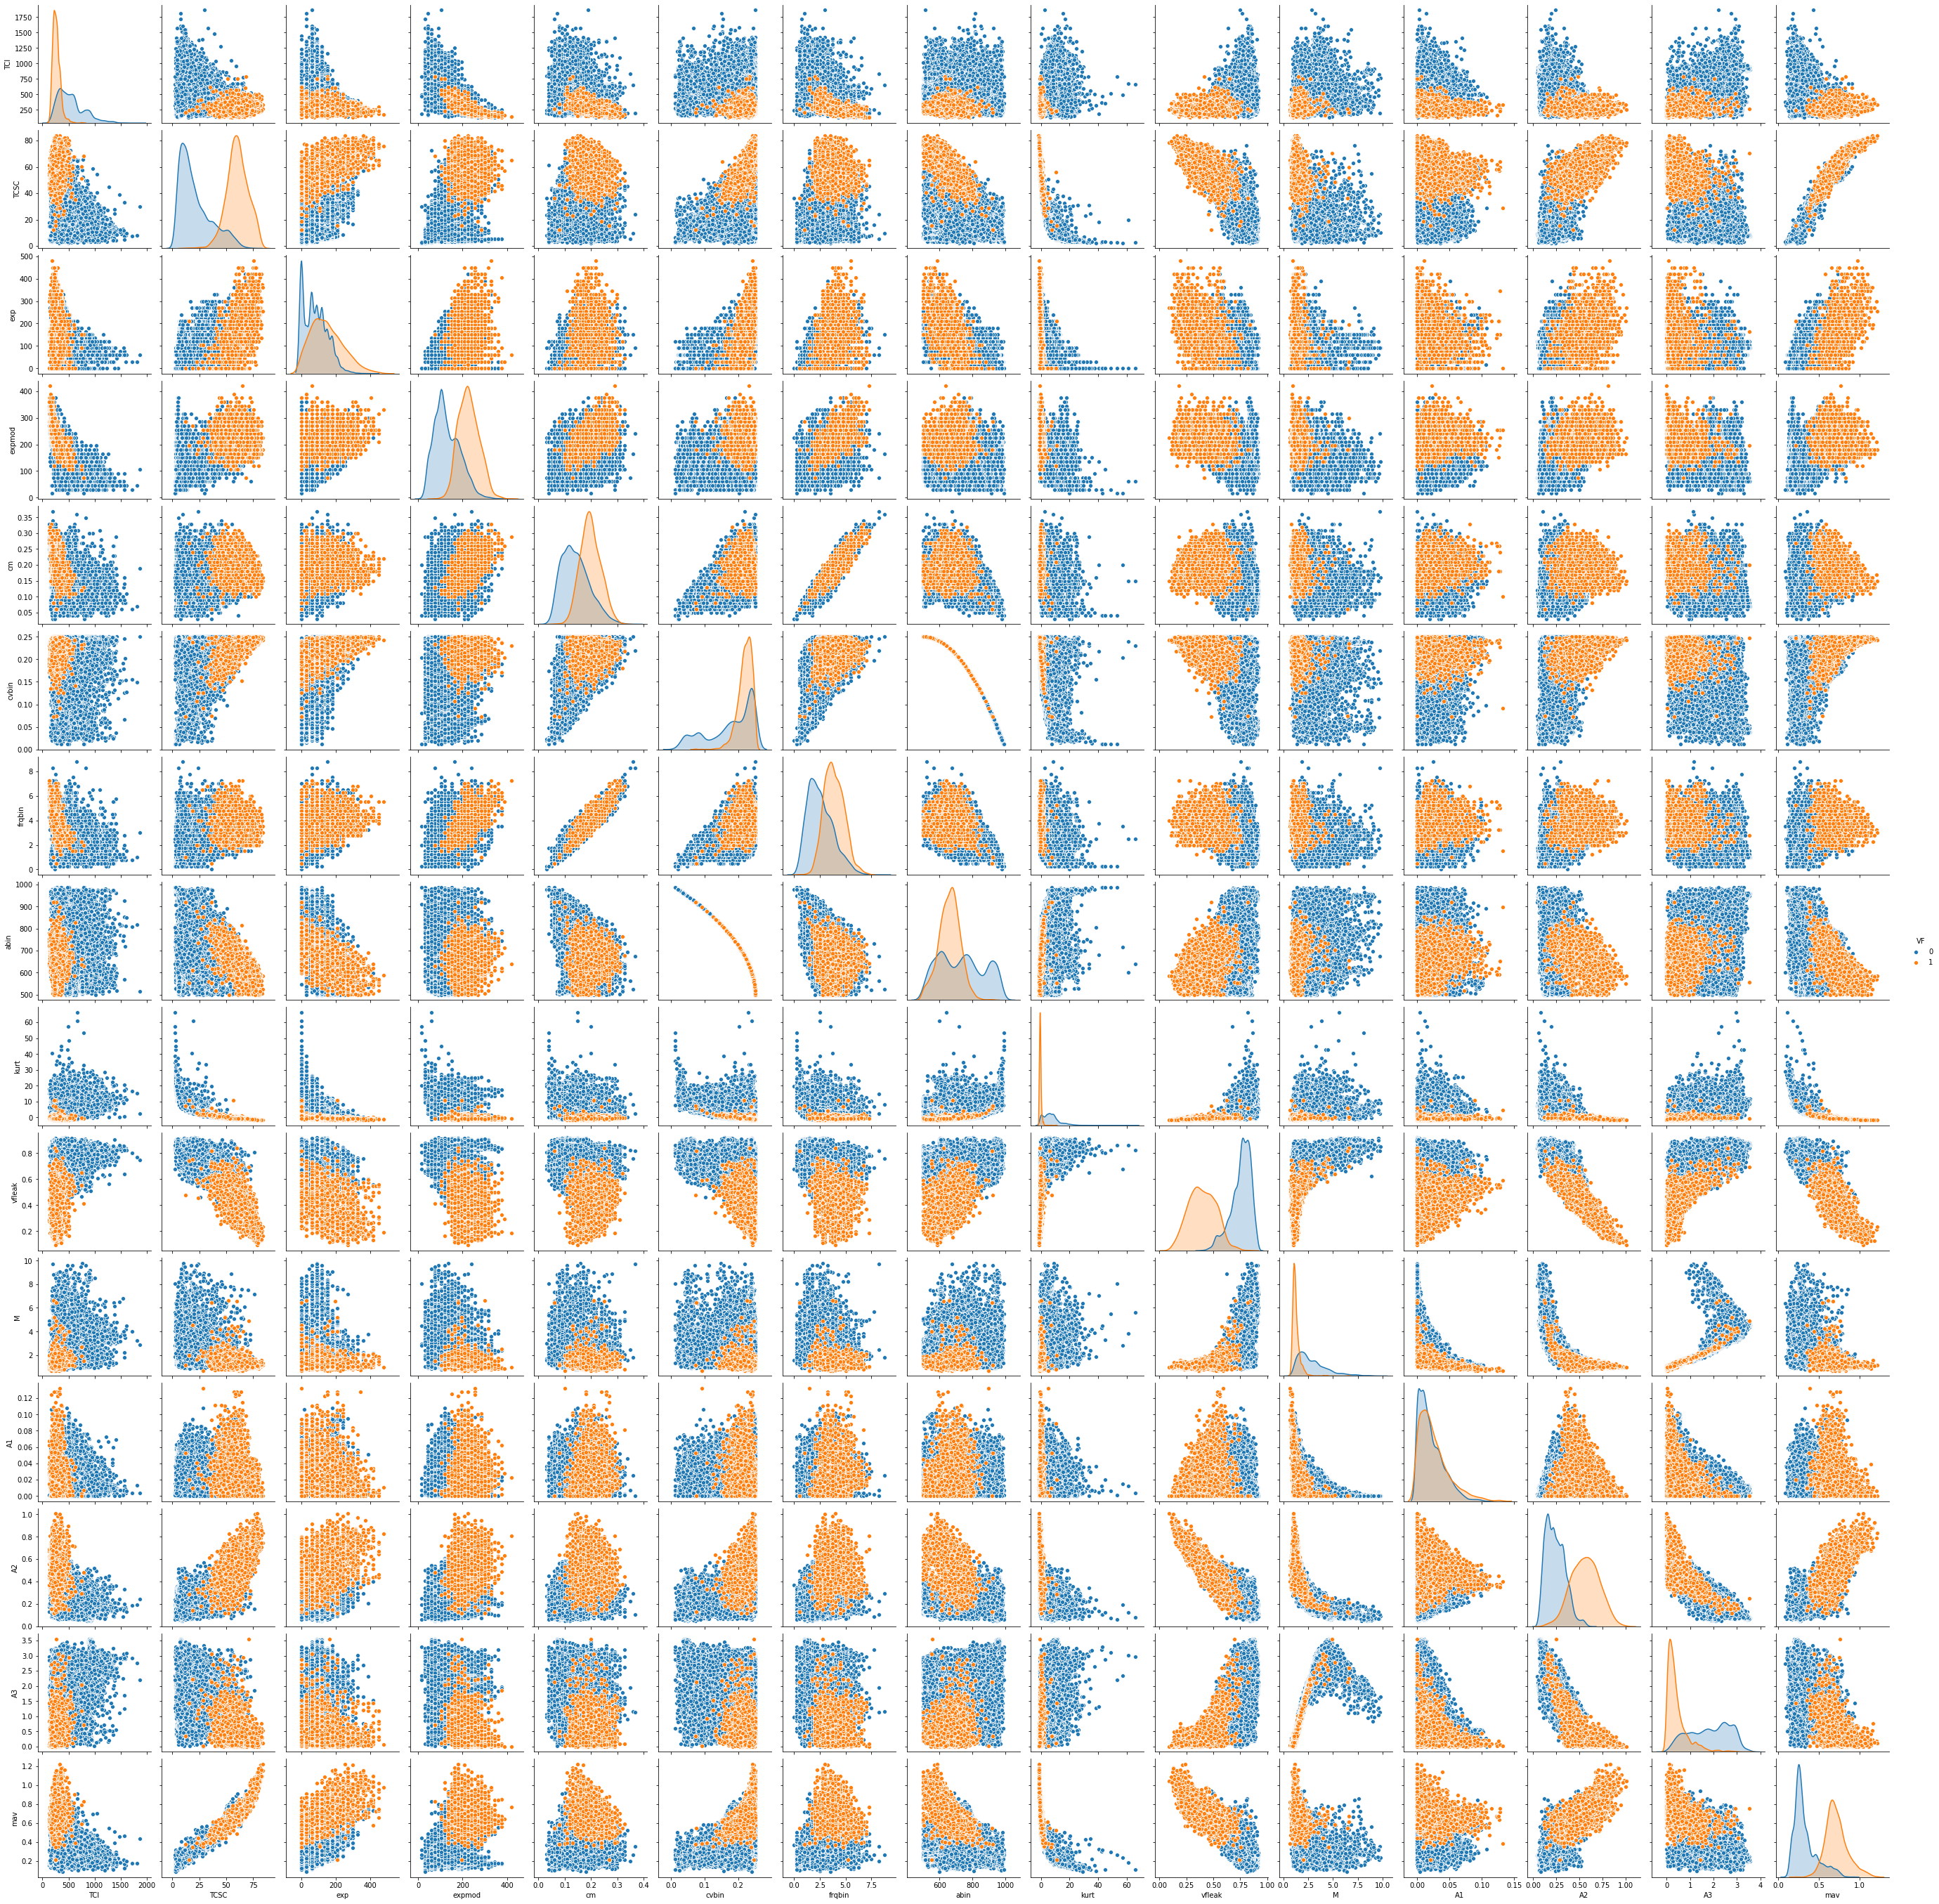

In [15]:
sns.pairplot(df[param1], hue = 'VF')

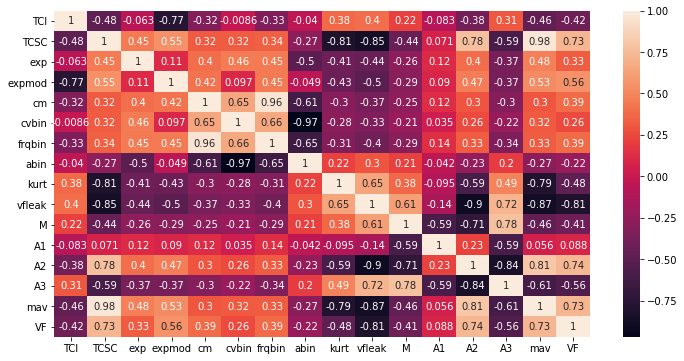

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df[param1].corr(),annot = True)

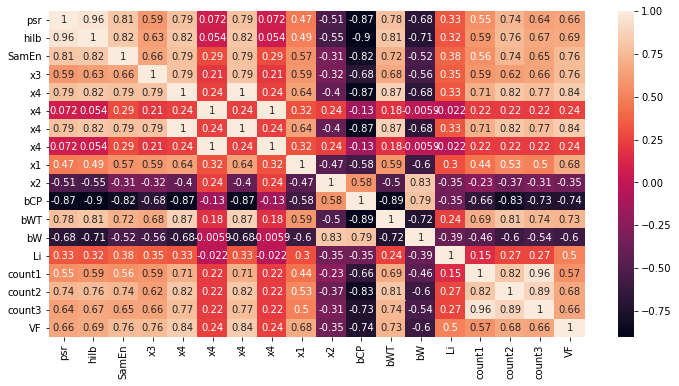

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df[param2].corr(),annot = True)

# DATA MODEL

## Train & Test Split

In [0]:
X = df.drop('VF',axis=1)
Y = df['VF']

seed = 123
test_size = 0.33 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
                                                    random_state=seed)
eval_set = [(X_test,y_test) ]

## 1. Training a Logistic Regression Model

In [19]:
log_mod1 = LogisticRegression(solver = 'liblinear',verbose=1)

log_mod1.fit(X_train,y_train)

y_pred = log_mod1.predict(X_test)


y_pred_proba = log_mod1.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)

[LibLinear]

### 1.1 Compute Metrics

In [20]:
mcm = metrics.confusion_matrix(y_test, y_pred)
tn = mcm[0, 0]
tp = mcm[1, 1]
fn = mcm[1, 0]
fp = mcm[0, 1]

BER = 1 - metrics.balanced_accuracy_score(y_test, y_pred)
Specificity = tn / (tn + fp)

print('Train/Test split results:')
print(log_mod1.__class__.__name__+" accuracy is %2.3f" % metrics.accuracy_score(y_test, y_pred))
print(log_mod1.__class__.__name__+" auc is %2.3f" % metrics.auc(fpr, tpr))
print(log_mod1.__class__.__name__+" Sensitivity is %2.3f" % metrics.recall_score(y_test, y_pred))
print(log_mod1.__class__.__name__+" Specificity is %2.3f" % Specificity) 
print(log_mod1.__class__.__name__+" BER is %2.3f" % BER)


Train/Test split results:
LogisticRegression accuracy is 0.985
LogisticRegression auc is 0.998
LogisticRegression Sensitivity is 0.953
LogisticRegression Specificity is 0.992
LogisticRegression BER is 0.027


## 2. Training a Naive Bayes Model

## 3. Training a Decision Tree Model


## 4. Training a Random Forest Model

## 5. Training a Adaboost Model

## 6. Training a XGBoost Model

In [24]:
len(X_train.columns)

30

In [25]:
len(set(X_train.columns))

29

In [28]:
set(X_train.columns)

{'A1',
 'A2',
 'A3',
 'Li',
 'M',
 'SamEn',
 'TCI',
 'TCSC',
 'abin',
 'bCP',
 'bW',
 'bWT',
 'cm',
 'count1',
 'count2',
 'count3',
 'cvbin',
 'exp',
 'expmod',
 'frqbin',
 'hilb',
 'kurt',
 'mav',
 'psr',
 'vfleak',
 'x1',
 'x2',
 'x3',
 'x4'}

In [27]:
X_train.columns

Index(['TCI', 'TCSC', 'exp', 'expmod', 'cm', 'cvbin', 'frqbin', 'abin', 'kurt',
       'vfleak', 'M', 'A1', 'A2', 'A3', 'mav', 'psr', 'hilb', 'SamEn', 'x3',
       'x4', 'x4', 'x1', 'x2', 'bCP', 'bWT', 'bW', 'Li', 'count1', 'count2',
       'count3'],
      dtype='object')

In [21]:
xgb_model_1 = XGBClassifier(n_estimators=500, nrounds = 10000, learning_rate = 0.02, num_parallel_tree=5)

xgb_model_1.fit(X_train, y_train, eval_set = eval_set, early_stopping_rounds= 10000)

ValueError: ignored